1. 利用pandas创建包含更多行和列的原始数据集(**创建一个人工数据集，并存储在CSV（逗号分隔值）文件**)。\
(1) 删除缺失值最多的列。\
(2) 将预处理后的数据集转换为张量格式。

In [5]:
import pandas as pd
import numpy as np
import torch
df = pd.DataFrame ({
    'A':[1,2,3,4],
    'B':[5,6,7,np.nan],
    'C':[np.nan,8,9,0],
    'D':[np.nan,np.nan,3,9]
})
print(df)
df.to_csv('homework1.csv', index=False)

index = df.isna().sum().idxmax()
df = df.drop(index,axis = 1)
print('\n',df)

tensor_df = torch.tensor(df.values)
print('\n',tensor_df)



   A    B    C    D
0  1  5.0  NaN  NaN
1  2  6.0  8.0  NaN
2  3  7.0  9.0  3.0
3  4  NaN  0.0  9.0

    A    B    C
0  1  5.0  NaN
1  2  6.0  8.0
2  3  7.0  9.0
3  4  NaN  0.0

 tensor([[1., 5., nan],
        [2., 6., 8.],
        [3., 7., 9.],
        [4., nan, 0.]], dtype=torch.float64)


2. 对于任意形状的张量`X`,`len(X)`是否总是对应于`X`特定轴的长度?这个轴是什么?

In [8]:
#len(x)返回的是张量x的第一个维度的长度,并不总是对应于x特定轴的长度。这个轴是张量的第一个轴，也叫0轴，通常对应于最外层的维度。

3. `A = torch.arange(20, dtype=torch.float32).reshape(5, 4)`, 运行`A/A.sum(axis=1)`，看看会发生什么。请分析一下原因？

In [11]:
# import torch
# A = torch.arange(20,dtype = torch.float32.reshape(5,4))
# print(A/A.sum(axis = 1))
#发生错误：AttributeError: 'torch.dtype' object has no attribute 'reshape'。原因是A为一个5*4的矩阵，而A.sum(axis = 1)是一个被拍扁的1维的向量，两者维数不匹配不能相除。

4. 考虑一个具有形状$(2,3,4)$的张量，在轴0、1、2上的求和输出是什么形状?

In [17]:
import torch
x = torch.rand(2,3,4)
sum0 = torch.sum(x,dim = 0)
sum1 = torch.sum(x,dim = 1)
sum2 = torch.sum(x,dim = 2)
print(sum0.shape,sum1.shape,sum2.shape)

torch.Size([3, 4]) torch.Size([2, 4]) torch.Size([2, 3])


5. 使$f(x)=\sin(x)+\exp(x)+\cos(x)$，利用torch自动微分绘制$f(x)$和$\frac{df(x)}{dx}$的图像。

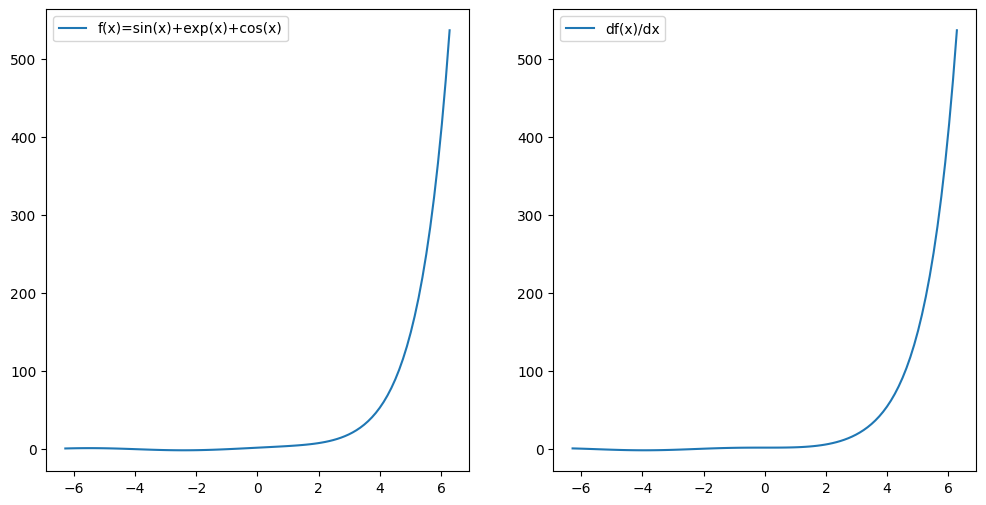

In [31]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return torch.sin(x) + torch.exp(x) + torch.cos(x)

x = torch.linspace(-2 * 3.1416,2 * 3.1416,100,requires_grad = True)
y = f(x)
y.sum().backward()
gradient = x.grad

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(x.detach().numpy(),y.detach().numpy(),label = 'f(x)=sin(x)+exp(x)+cos(x)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x.detach().numpy(),gradient.detach().numpy(),label = 'df(x)/dx')
plt.legend()

plt.show()

